# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [2339]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2340]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [2341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [2342]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


array([[<AxesSubplot: title={'center': 'Well'}>,
        <AxesSubplot: title={'center': 'Por'}>,
        <AxesSubplot: title={'center': 'Perm'}>],
       [<AxesSubplot: title={'center': 'AI'}>,
        <AxesSubplot: title={'center': 'Brittle'}>,
        <AxesSubplot: title={'center': 'TOC'}>],
       [<AxesSubplot: title={'center': 'VR'}>,
        <AxesSubplot: title={'center': 'Prod'}>, <AxesSubplot: >]],
      dtype=object)

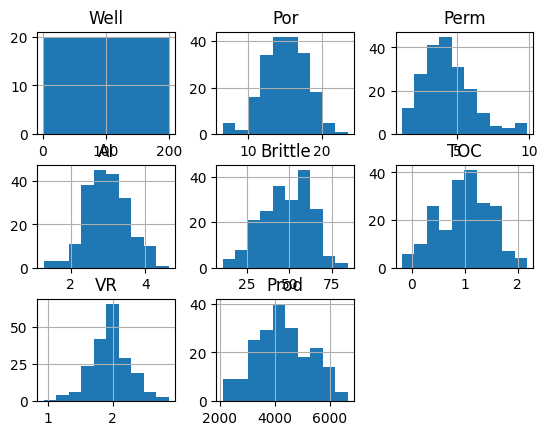

In [2343]:
data.hist()

Видим, что наш датасет состоит из одного категориального признака Well (который по порядку нумерует скважины от 1 до 200 ) и остальных нормально-распределенных количественных признаков, которые сильно отличаются по масштабу. 

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [2344]:
data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


<AxesSubplot: >

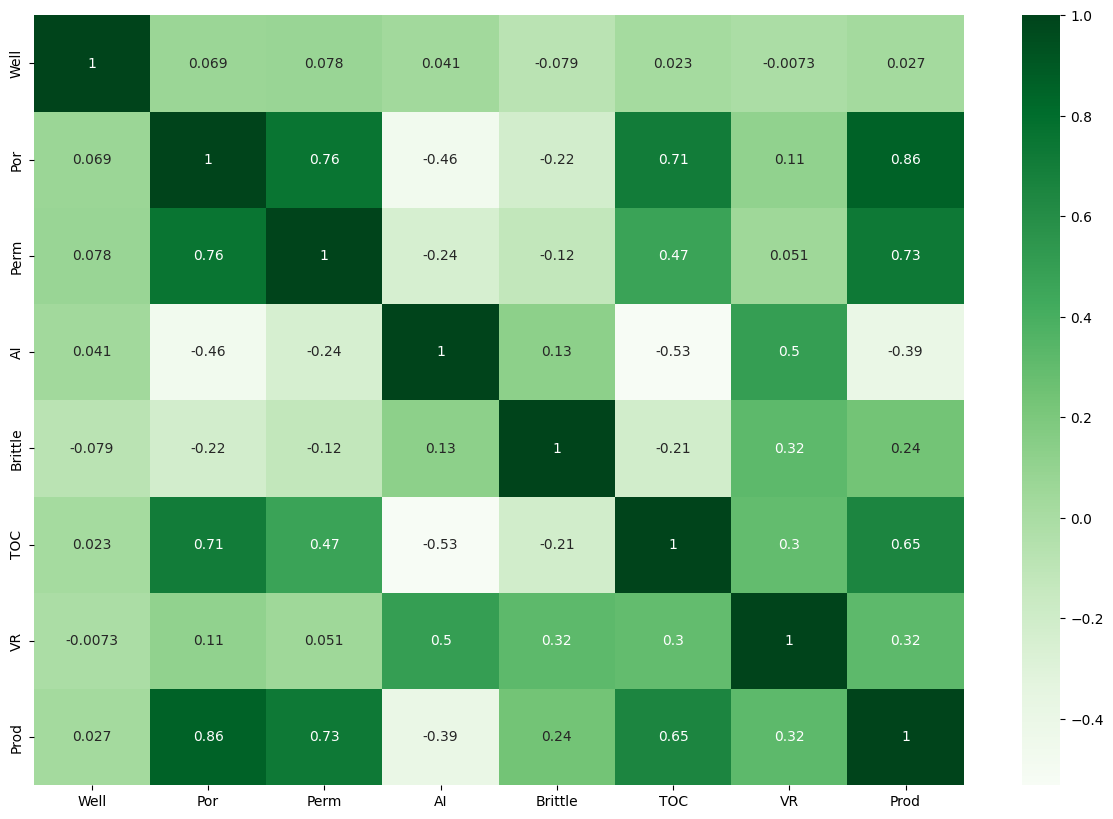

In [2345]:
# построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens')

Тепловая карта корреляции показывает, что очень сильную взаимосвязь имеют факторы Por и Perm, Por и TOC, Por и Prod, Perm и Prod. А признак Well почти не имеет связи ни с одной переменной.

In [2346]:
# вычислим определитель матрицы
np.linalg.det(data.corr())

0.0007299388072652069

In [2347]:
# вычислим ранг матрицы
np.linalg.matrix_rank(data.corr())

8

Матрица корреляций имеет размер 8х8, ее ранг равен 8, но определитель близок к нулю. Формально линейной зависимости между факторами нет, но матрица корреляции практически вырождена, несмотря на то, что имеет максимальный ранг. 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [2348]:
X = data.drop('Prod', axis = 1)
y = data['Prod']
X

,Well,Por,Perm,AI,Brittle,TOC,VR
0,1,12.08,2.92,2.80,81.40,1.16,2.31
1,2,12.38,3.53,3.22,46.17,0.89,1.88
2,3,14.02,2.59,4.01,72.80,0.89,2.72
3,4,17.67,6.75,2.63,39.81,1.08,1.88
4,5,17.52,4.57,3.18,10.94,1.51,1.90
...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06
196,197,17.99,9.87,3.38,44.32,0.98,2.08
197,198,12.12,2.27,3.52,57.07,-0.04,1.73
198,199,15.55,4.48,2.48,58.25,1.89,2.35


In [2349]:
A = pd.DataFrame(np.column_stack((np.ones(200), X)))
print(A.shape)

(200, 8)


In [2350]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values.round())

[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


In [2351]:
# второй способ для проверки
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print(model.coef_.round())

[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


Из текущих расчетов мы можем понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу: например, фактор Perm имеет коэффициент 230, значит при изменении проницаемости скважины на 1 единицу, добыча газа увеличится на 230 млн кубических футов.  Фактор AI имеет коэффициент -365, значит при увеличении акустического импеданса на 1 единицу, добыча газа снизится на 365 млн куб. футов. Фактор Well имеет нулевой коээфициент (при округлении до целого), значит его изменение не влияет на добычу. 

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [2352]:
new_f= {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
new=np.array([[
    1,new_f['Well'], 
    new_f['Por'], 
    new_f['Perm'], 
    new_f['AI'], 
    new_f['Brittle'], 
    new_f['TOC'],
    new_f['VR'] ]])
y_pred_new_factor= new@w_hat
print('prediction:', y_pred_new_factor[0])

prediction: 4723.064053707423


In [2353]:
y_new = 4748.315024
# рассчитаем 
MAPE_new_factor = ((y_new - y_new_pred) / y_new)* 100
MAPE_new_factor

array([0.53178802])

In [2354]:
from sklearn import metrics
# создадим столбец предсказаний
y_pred = A@w_hat

# выведем метрики MAPЕ и коэффициент детерминации
print('MAPE {:.2f}%'.format(metrics.mean_absolute_percentage_error(y, y_pred)*100))
print('R^2: {:.2f}'.format(metrics.r2_score(y, y_pred)))

MAPE 3.63%
R^2: 0.96


Средняя абсолютная процентная ошибка составила 3,63%. И метрика R-квадрат равна 0,96, значение которой очень близко к 1, говорит о том, что модель хорошо подстроилась под данные. 

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [2355]:
# посмотрим на коээфициенты коррелляции между целевым признаком и факторами и 
#сравним их знаки с знаками коэффициентов линейной регрессии
corr = data.corr()
corr_y = corr['Prod'][:-1] # уберем последний коэффициент коррелляции целевого признака с самим собой
print(corr_y.values.round(2))
# выведем коэффициенты линейной регрессии без интерсепта
print(w_hat[1:].values.round())

[ 0.03  0.86  0.73 -0.39  0.24  0.65  0.32]
[   0.  230.  116. -365.   25.  -78.  785.]


Коэффициент корреляции с целевым признаком у фактора TOC  равен 0.65, что говорит о сильной прямой взаимосвязи. С увеличением TOC растет и Prod.
При этом коэффициент линейной регрессии при этом факторе отрицательный и равен -78, то есть при увеличении общего органического углерода на 1 единицу, значение добычи в данной формуле с текущими коэффициентами уменьшается на 78 млн куб. футов, а при уменьшении TOC на 1 соответственно увеличивается на 78. 
Возможно, такое поведение модели вызвано наличием мультиколлинеарности, так как мы обучили модель, используя сильно скоррелированные признаки.  Такую модель сложно интерпретировать.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

<AxesSubplot: >

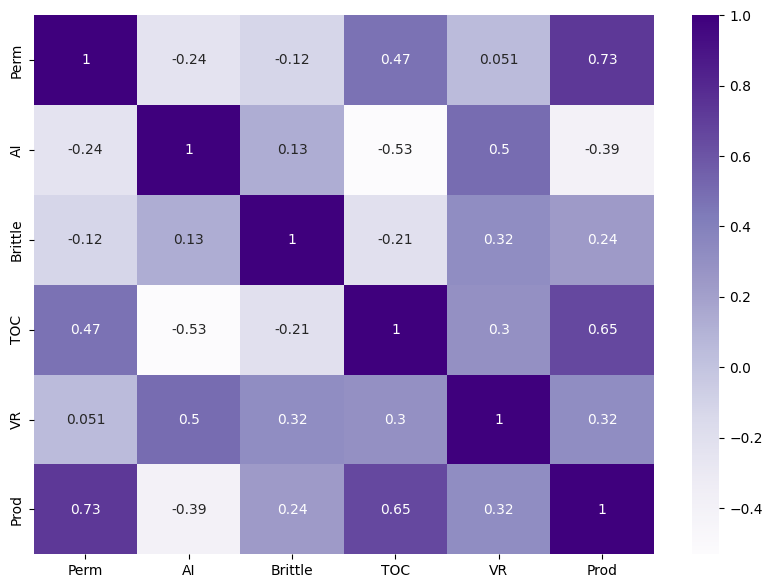

In [2356]:
# удалим признак Por, тк он сильно связан с признаками TOC и Perm с коэффициентами выше 0.7.
# и удалим признак Well как неинформативный с очень низким коэффициентом корреляции по отношению ко всем остальным признакам.
data = data.drop(['Por', 'Well'] , axis = 1)
# посмотрим на тепловую карту корреляций
plt.figure(figsize = (10, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'Purples')

In [2357]:
# заново обозначим факторы X
X_new = data.drop('Prod', axis = 1)
X_new.head()

,Perm,AI,Brittle,TOC,VR
0,2.92,2.80,81.40,1.16,2.31
1,3.53,3.22,46.17,0.89,1.88
2,2.59,4.01,72.80,0.89,2.72
3,6.75,2.63,39.81,1.08,1.88
4,4.57,3.18,10.94,1.51,1.90


In [2358]:
# создадим новую матрицу данных
A_new = np.column_stack((np.ones(200), X_new))
print(f"размер новой матрицы А: {A_new.shape}")
# найдем новые кэффициенты линейной регрессии после удаления признаков
w_hat_new = np.linalg.inv(A_new.T@A_new)@A_new.T@y
print(f"значения новых коэффициентов линейной регресии: {w_hat_new.round()}")

размер новой матрицы А: (200, 6)
значения новых коэффициентов линейной регресии: [1587.  348. -875.   16.   27. 1531.]


In [2359]:
# сделаем предсказание 
y_pred_new = A_new@w_hat_new
# выведем метрики MAPЕ и коэффициент детерминации
print('MAPE {:.2f}%'.format(metrics.mean_absolute_percentage_error(y, y_pred_new)*100))
print('R^2: {:.2f}'.format(metrics.r2_score(y, y_pred_new)))

MAPE 7.24%
R^2: 0.85


In [2360]:
# снова посмотрим на коээфициенты корреляции между целевым признаком и факторами и 
#сравним их знаки с знаками коэффициентов линейной регрессии
corr = data.corr()
corr_y = corr['Prod'][:-1] # уберем последний коэффициент корреляции целевого признака с самим собой
print(corr_y.values)
# выведем коэффициенты линейной регрессии без интерсепта
print(w_hat_new[1:])

[ 0.72742614 -0.39083477  0.23715533  0.6544452   0.32318155]
[ 347.59018015 -874.71210217   16.24171593   26.78168114 1531.08262732]


- После удаления двух признаков коэффициенты линейной регрессии ожидаемо изменились. Свободный член стал положительный и равен 1587. Это значит, что если значения всех факторов равны нулю, то значение целевого признака равно 1587. Ранее оно было отрицательным, что не логично, так как добыча не может быть отрицательной, даже если другие факторы равны нулю. 
- Больше нет противоречия в знаках коэффициентов корреляции и линейной регрессии: прямая связь корреляции с целевым признаком соответствует положительному коэффициенту регрессии при этом факторе, а обратная отрицательному. Больше нет нулевых коэффициентов регрессии, все факторы имеют значение. 
- Видим, что после удаления пары признаков значение метрики MAPE стало чуть выше и равно 7,24%, а коэффициент детерминации ниже и равен 0.85. То есть качество предсказания стало все же немного хуже по отношению к предыдущему.  


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [2361]:
# второй способ для проверки
# создаём модель линейной регрессии
model_new = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model_new.fit(A_new, y)
print(model_new.coef_.round())

[1587.  348. -875.   16.   27. 1531.]


In [2362]:
#выведем коэффициенты линейной регрессии для обновленных данных, полученные матричным умножением
w_hat_new.round()

array([1587.,  348., -875.,   16.,   27., 1531.])

Видим, что коэффициенты совпадают. 

In [2363]:
# сделаем предсказание через библиотеку sklearn
y_pred_new_sklearn = model_new.predict(A_new)
y_pred_new_sklearn = pd.Series(y_pred_new_sklearn.round())
y_pred_new = pd.Series(y_pred_new.round())

In [2364]:
# проверим, что все значения предсказаний, полученные матричным способом и методом sklearn  совпадают:
print((y_pred_new-y_pred_new_sklearn).value_counts())

0.0    200
dtype: int64


Видим, что совпадают и коэффициенты, и сами предсказания. 

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [2365]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [2366]:
s_scaler = StandardScaler()
# кодируем исходный датасет
X_s = s_scaler.fit_transform(X_new)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
X_s = pd.DataFrame(A_s)
X_s.head()

,0,1,2,3,4,5
0,1,-0.817030,-0.298603,2.358297,0.352948,1.152048
1,1,-0.463751,0.444147,-0.141332,-0.209104,-0.280931
2,1,-1.008148,1.841224,1.748113,-0.209104,2.518377
3,1,1.401098,-0.599240,-0.592585,0.186414,-0.280931
4,1,0.138561,0.373409,-2.640962,1.081534,-0.214280


In [2367]:
# создадим полиномиальную регрессию 3 степени без столбца единиц
poly = PolynomialFeatures(degree=3, include_bias= False)
X_poly = poly.fit_transform(X_s)
display(pd.DataFrame(X_poly).shape)

(200, 83)

In [2368]:
# создаём модель линейной регрессии
model_poly = LinearRegression()

# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(model_poly, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print(f"MAPE на тренировочных фолдах: {round((- cv_results['train_score'].mean()* 100), 2)} %")
print(f"MAPE на валидационных фолдах: {round((-cv_results['test_score'].mean() * 100), 2)} %")

MAPE на тренировочных фолдах: 5.86 %
MAPE на валидационных фолдах: 9.38 %


Видим, что метрика MAPE стала лучше на полиноме третьей степени, снизилась с 7,24% до 5,86%. Однако, видим, что на валидационной выборке ошибка значительно выше. То есть модель склонна к переобучению. 

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# воспользуемся методом случайного поиска для подбора параметра альфа
param_grid = {'alpha': list(np.linspace(0.01, 30, 100, dtype=float))}
model_lasso = Lasso()
random_search = RandomizedSearchCV(
   estimator = model_lasso, 
   param_distributions = param_grid, 
   n_iter = 100, 
   random_state=42)
random_search.fit(X_poly, y)

In [2370]:
print(f"Наилучшие значения гиперпараметров: {random_search.best_params_}")

Наилучшие значения гиперпараметров: {'alpha': 22.42676767676768}


In [2371]:
# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=random_search.best_estimator_.alpha, max_iter=10000)

# оцениваем качество модели на кросс-валидации, метрика МАРЕ
cv_results_l1 = cross_validate(lasso, X_poly, y, 
                scoring='neg_mean_absolute_percentage_error', 
                cv=5, return_train_score=True)
print(f"MAPE на тренировочных фолдах: {round(-cv_results_l1['train_score'].mean()* 100,2)} %")
print(f"MAPE на валидационных фолдах: {round(-cv_results_l1['test_score'].mean() * 100,2)} %")

MAPE на тренировочных фолдах: 6.44 %
MAPE на валидационных фолдах: 7.45 %


С помощью RandomizedSearchCV метода поиска гиперпараметров установлено, что оптимальное значение альфа равно 10. Обучили модель линейной регрессии c L1-регуляризацией, оценили качество модели на кросс-валидации по метрике МАРЕ и видим, что благодаря L1-регуляризации нам удалось улучшить качество предсказания на валидационной выборке с 9,38% до 7,63%, то есть модель уже не так склонна к переобучению. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
param_grid = {'alpha': list(np.linspace(0.1, 50, 100, dtype=float))}
model_ridge = Ridge()
random_search = RandomizedSearchCV(
   estimator = model_ridge, 
   param_distributions = param_grid, 
   n_iter = 100, 
   random_state=42)
random_search.fit(X_poly, y)

In [2373]:
print(f"Наилучшие значения гиперпараметров: {random_search.best_params_}")

Наилучшие значения гиперпараметров: {'alpha': 41.43131313131313}


In [2374]:
# создаём модель линейной регрессии c L1-регуляризацией
ridge = Ridge(alpha=random_search.best_estimator_.alpha, max_iter=10000)

In [2375]:
# оцениваем качество модели на кросс-валидации, метрика МАРЕ
cv_results_l2 = cross_validate(ridge, X_poly, y,
                scoring='neg_mean_absolute_percentage_error',
                cv=5, return_train_score=True)
# выведем значения метрики МАРЕ 
print(f"MAPE на тренировочных фолдах: {round(-cv_results_l2['train_score'].mean()* 100,2)} %")
print(f"MAPE на валидационных фолдах: {round(-cv_results_l2['test_score'].mean() * 100,2)} %")

MAPE на тренировочных фолдах: 6.21 %
MAPE на валидационных фолдах: 8.17 %


L2 регуляризация тоже помогла снизить переобучение, но показала результат чуть хуже, чем L1 регуляризация.


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [2376]:
params = {'alpha':list(np.linspace(0.01, 30, 100, dtype=float)), 'l1_ratio': list(np.linspace(0.1, 50, 100, dtype=float))}
         
model_elnet = ElasticNet()
gr = GridSearchCV(model_elnet, params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')
gr.fit(X_poly,y)

c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
49000 fits failed out of a total of 50000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.31292929292929295,
                                   0.6158585858585859, 0.9187878787878788,
                                   1.2217171717171718, 1.5246464646464648,
                                   1.8275757575757576, 2.1305050505050502,
                                   2.4334343434343433, 2.7363636363636363,
                                   3.0392929292929294, 3.342222222222222,
                                   3.645151515151515, 3.948080808080808,
                                   4.251010101010101, 4.55393939...
                                      6.148484848484848, 6.652525252525253,
                                      7.156565656565657, 7.66060606060606,
                                      8.164646464646465, 8.66868686868687,
                                      9.172727272727274, 9.676767676767676,
                                      10.180808080808081, 10.684848484848485,
                                      11.188888888888888, 11.692929292929293,
                                      12.196969696969697, 12.701010101010102,
                                      13.205050505050506, 13.709090909090909,
                                      14.213131313131314, 14.717171717171718, ...]},
             scoring='neg_mean_absolute_percentage_error')

In [2377]:
print(gr.best_estimator_.alpha)
print(gr.best_estimator_.l1_ratio)

0.31292929292929295
0.604040404040404


In [2378]:
# создаём модель линейной регрессии c L1- и L2-регуляризациями
el_net = ElasticNet(alpha=gr.best_estimator_.alpha,
                    l1_ratio=gr.best_estimator_.l1_ratio,
                    max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results_elnet = cross_validate(el_net, X_poly, y, 
            scoring='neg_mean_absolute_percentage_error', 
            cv=5, return_train_score=True)

print(f"MAPE на тренировочных фолдах: {round(-cv_results_elnet['train_score'].mean()* 100,2)} %")
print(f"MAPE на валидационных фолдах: {round(-cv_results_elnet['test_score'].mean() * 100,2)} %")

MAPE на тренировочных фолдах: 5.83 %
MAPE на валидационных фолдах: 8.08 %


С регуляризацией с помощью ElasticNet значение метрики МАРЕ на тренировочных фолдах самое низкое, однако на валидационных данных видно, что модель склонна к переобучению больше, чем с L1 и L2 регуляризацией. 

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

Перед тем, как заполнить таблицу, сделаем кросс-валидацию на первой модели линейной регрессии, которую построили на обновленных данных после удаления признаков, но до генерации полиномиальных признаков, чтобы так же оценить метрику МАРЕ на тренировочной и валидационной выборке у этой модели. 

In [2379]:
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results_linear = cross_validate(model_new, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print(f"MAPE на тренировочных фолдах: {round((- cv_results_linear['train_score'].mean()* 100), 2)} %")
print(f"MAPE на валидационных фолдах: {round((-cv_results_linear['test_score'].mean() * 100), 2)} %")

MAPE на тренировочных фолдах: 7.8 %
MAPE на валидационных фолдах: 8.18 %



|   **Модель**     |**Гиперпараметры**|**Is poly?**|**МАРЕ train**|**МАРЕ test**|
|:-----------------|:-----------------|:-----------|:-------------|:------------|
|Линейная регрессия|                  |   нет      |   7.18%      |   8.18%     |
|Полином 3 степени |                  |   да       |   5.86%      |   9.38%     |
|L1 регуляризация  | α = 0.22         |   да       |   6.44%      |   7.45%     | 
|L2 регуляризация  | α = 41.0         |   да       |   6.21%      |   8.17%     |
|Elastic net       | α = 0.31, λ = 0.6|   да       |   5.83%      |   8.08%     |

Мы построили пять моделей и видим, что наилучшее значение метрики на тренировочных данных показала модель Elastic net, однако она склонна к переобучению, так как качество метрики МАРЕ на валидационных фолдах значительно хуже, чем на тренировочных (5.83 и 8.08 процентов соответственно). 
А наилучшее (наименьшее) значение метрики на валидационных данных показала модель с L1 регуляризацией и она же отлично справилась с переобучением, так разница в значениях метрики между тренировочными и валидационными данными самая низкая. 

Рекомендовано выбрать именно эту модель  - модель L1-регуляризации, построенную на полиноме 3 степени с коэффициентом силы регуляризации, равным 0.22.